In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Choose which (m,n) pairs to include ---
max_m, max_n = 2, 2
eigen_indices = [(m, n)
                 for m in range(-max_m, max_m+1)
                 for n in range(-max_n, max_n+1)]
num_eigen = len(eigen_indices)

# --- 2. Parameter grid on the flat torus [0,2π)^2 ---
n_theta, n_phi = 1000, 1000
theta = np.linspace(0, 2*np.pi, n_theta, endpoint=False)
phi   = np.linspace(0, 2*np.pi, n_phi, endpoint=False)
Theta, Phi = np.meshgrid(theta, phi)

dtheta = theta[1] - theta[0]
dphi   = phi[1]   - phi[0]
dA     = dtheta * dphi      # area element on flat torus

# uniform density ρ = 1/Area
area = (2*np.pi)**2
rho = np.ones_like(Theta) / area

# --- 3. Precompute storage ---
f_list             = []
grad_f2_list       = []
lambda_list        = []

# --- 4. Loop over eigenfunctions ---
for m, n in eigen_indices:
    λ = m**2 + n**2
    lambda_list.append(λ)

    # real eigenfunction
    f = np.cos(m*Theta + n*Phi)

    # normalize in L2(ρ dA)
    norm = np.sqrt(np.sum(f**2 * rho * dA))
    f   = f / norm
    f_list.append(f)

    # numerical gradient on the grid
    df_dθ = np.gradient(f, dtheta, axis=1)
    df_dφ = np.gradient(f, dphi,   axis=0)

    # squared norm of gradient
    grad2 = df_dθ**2 + df_dφ**2
    grad_f2_list.append(grad2)

# --- 5. Compute σ_η for each eigenfunction ---
sigma_eta = []
for i in range(num_eigen):
    num = 2 * lambda_list[i]
    den = np.sum(grad_f2_list[i] * rho**2 * dA)
    sigma_eta.append(num / den)

# --- 6. Assemble the variance–covariance matrix ---
V = np.zeros((num_eigen+1, num_eigen+1))
for i in range(num_eigen):
    ti = lambda_list[i] + lambda_list[i]*f_list[i]**2 - sigma_eta[i]*grad_f2_list[i]*rho
    for j in range(num_eigen):
        tj = lambda_list[j] + lambda_list[j]*f_list[j]**2 - sigma_eta[j]*grad_f2_list[j]*rho
        V[i+1, j+1] = np.sum(ti * tj * rho * dA)

# --- 7. Plot heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(V, cmap="coolwarm")
plt.xlabel("Eigen‐function index")
plt.ylabel("Eigen‐function index")
plt.tight_layout()
plt.show()


C:\Users\95889\AppData\Local\Temp\ipykernel_61596\4066640685.py:57: RuntimeWarning: invalid value encountered in scalar divide
  sigma_eta.append(num / den)


C:\Users\95889\AppData\Local\Temp\ipykernel_61596\1611172915.py:58: RuntimeWarning: invalid value encountered in scalar divide
  sigma_eta.append(num / den)


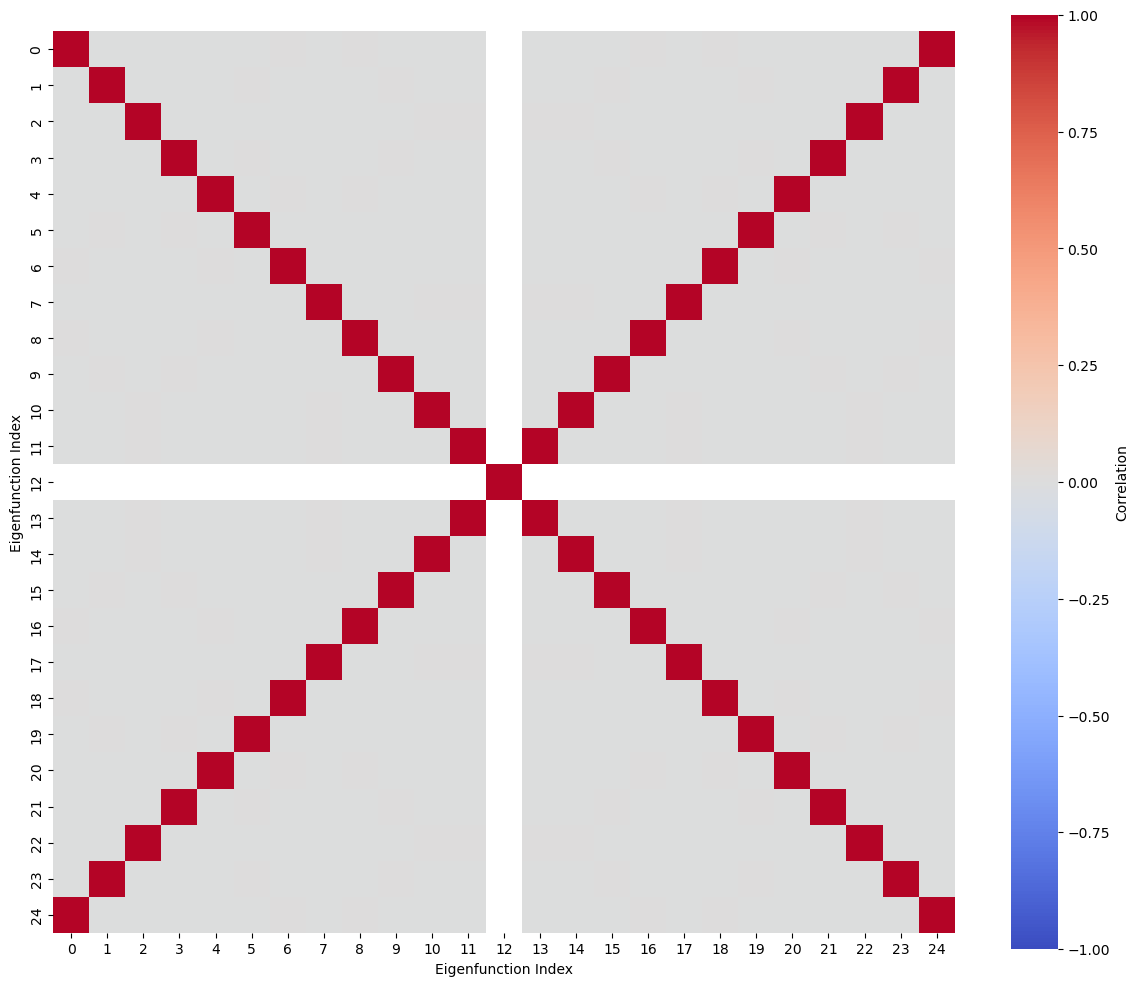

In [ ]:
## Produce the correlation matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Choose eigenfunction indices ---
max_m, max_n = 2, 2
eigen_indices = [(m, n)
                 for m in range(-max_m, max_m+1)
                 for n in range(-max_n, max_n+1)]
num_eigen = len(eigen_indices)

# --- 2. Parameter grid on flat torus [0,2π)^2 ---
n_theta, n_phi = 500, 500
theta = np.linspace(0, 2*np.pi, n_theta, endpoint=False)
phi   = np.linspace(0, 2*np.pi, n_phi, endpoint=False)
Theta, Phi = np.meshgrid(theta, phi)

dtheta = theta[1] - theta[0]
dphi   = phi[1]   - phi[0]
dA     = dtheta * dphi

# uniform density ρ = 1/Area
area = (2*np.pi)**2
rho = np.ones_like(Theta) / area

# --- 3. Precompute storage ---
f_list       = []
grad_f2_list = []
lambda_list  = []

# --- 4. Loop over eigenfunctions ---
for m, n in eigen_indices:
    λ = m**2 + n**2
    lambda_list.append(λ)

    # real eigenfunction
    f = np.cos(m*Theta + n*Phi)

    # normalize in L²(ρ dA)
    norm = np.sqrt(np.sum(f**2 * rho * dA))
    f /= norm
    f_list.append(f)

    # numerical gradient
    df_dθ = np.gradient(f, dtheta, axis=1)
    df_dφ = np.gradient(f, dphi, axis=0)

    grad2 = df_dθ**2 + df_dφ**2
    grad_f2_list.append(grad2)

# --- 5. Compute σ_η for each eigenfunction ---
sigma_eta = []
for i in range(num_eigen):
    num = 2 * lambda_list[i]
    den = np.sum(grad_f2_list[i] * rho**2 * dA)
    sigma_eta.append(num / den)

# --- 6. Assemble variance–covariance matrix ---
V = np.zeros((num_eigen+1, num_eigen+1))
for i in range(num_eigen):
    ti = lambda_list[i] + lambda_list[i]*f_list[i]**2 - sigma_eta[i]*grad_f2_list[i]*rho
    for j in range(num_eigen):
        tj = lambda_list[j] + lambda_list[j]*f_list[j]**2 - sigma_eta[j]*grad_f2_list[j]*rho
        V[i+1, j+1] = np.sum(ti * tj * rho * dA)

# --- 7. Convert covariance → correlation matrix ---
stds = np.sqrt(np.diag(V))
denom = np.outer(stds, stds)
correlation_matrix = V / denom
np.fill_diagonal(correlation_matrix, 1.0)

# --- 8. Plot correlation heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    square=True,
    cbar_kws={"label": "Correlation"}
)
plt.xlabel("Eigenfunction Index")
plt.ylabel("Eigenfunction Index")
#plt.title("Correlation Matrix Heatmap for Laplace–Beltrami on T²")
plt.tight_layout()
plt.show()


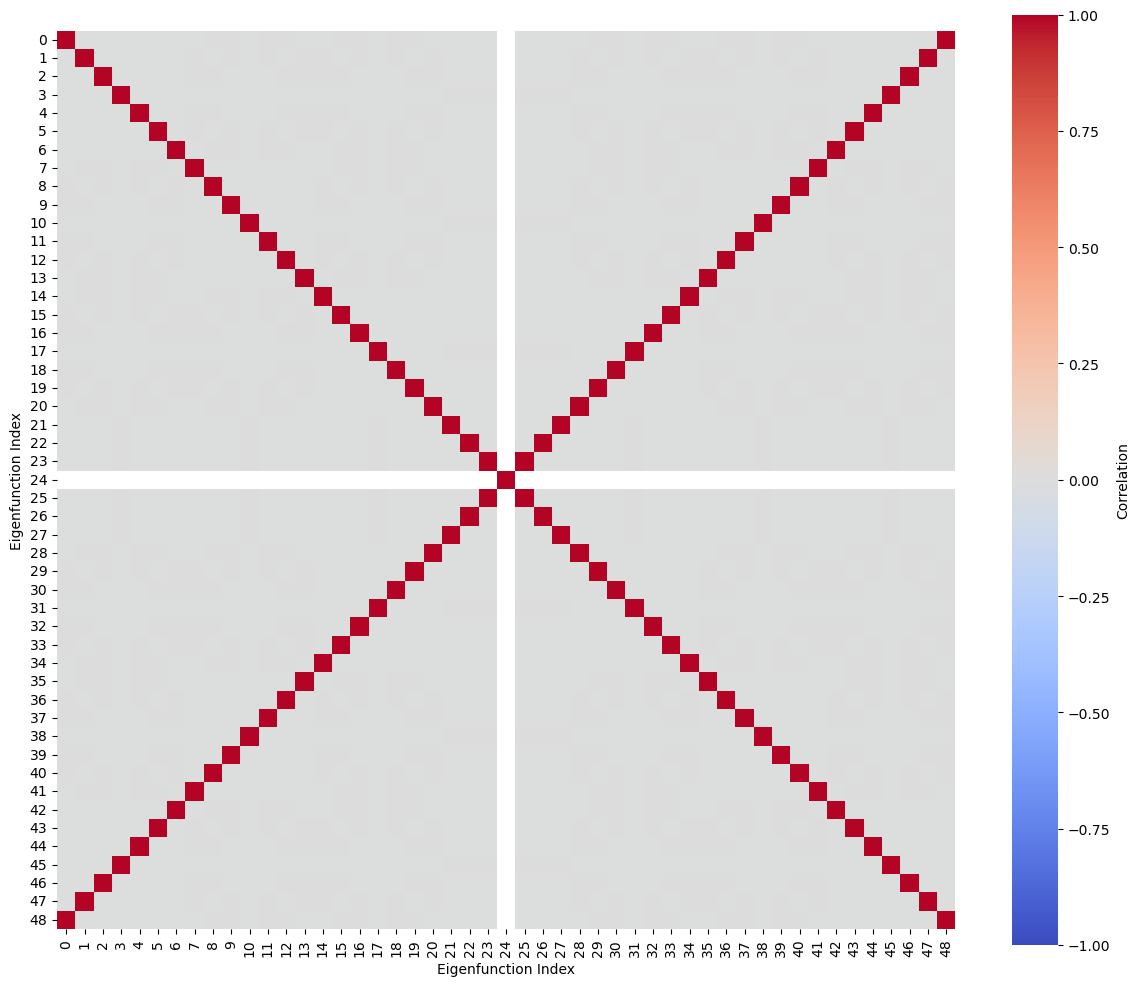

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    square=True,
    cbar_kws={"label": "Correlation"}
)
plt.xlabel("Eigenfunction Index")
plt.ylabel("Eigenfunction Index")
#plt.title("Correlation Matrix Heatmap for Laplace–Beltrami on T²")
plt.tight_layout()
plt.show()